 # Linear Regression

The goal of regression is to predict the value of one or more continuous target variables *y* given a set of independent variables *x*. Linear regression is a linear model that assumes linear relationship between the input variables *(x)* and the single output variable *(y)*. Linear regression can be classified in two categories: -
- Simple Linear Regression (Single Input Variable)
- Multiple Linear Regression (Multiple Input Variable)

The general prediction formula for a simple linear model looks like: -
<br>
<br>
<font size = 5><center>$\hat{y} = wx + b$</center></font>
<br>
<font size = 3>$\hat{y}$</font> : Predcitions that the model makes
<font size = 3>$x$</font> : Denotes feature or independent variable
<font size = 3>$w, b$</font> : Parameters of the model that are learned

The task of the machine learning model is to learn the best fit parameters based on the data available.

### Let's Code

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data in the form of dataframe
train_data = pd.read_csv("train.txt")
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
train_data.info()
train_data.dropna(axis=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Linear Algebra
Linear algebra is a branch of mathematics which can also be represented as mathematics of data. The study of linear algebra involves various types of mathematical objects: - 

- Scalar - A scalar is just a single number. It is of shape (1,1).
```python
array([[-1.60386882]])
```

- Vector - A vector is a 1-Dimensional array of numbers. It is of shape (1,m) or (m,1).

```python 
#shape(5,1)
array([[-1.87442528],
       [-0.67878918],
       [-0.69630763],
       [ 1.26271851],
       [ 0.48726999]])
```
```python
#shape(1,5)
array([[ 0.01378552,  0.51181618, -2.2253128 , -0.129636  ,  0.9842876 ]])
```


- Matrices - A matrix is a 2-Dimensional array of numbers of shape (m,n).

```python
#shape(2,3)
array([[ 0.65451017,  1.23728071, -0.40055945],
       [ 0.66194299,  0.56523415,  2.43112639]])
```

- Tensors - A tensor is considered to be a multidimensional array of shape (i,m,n), where i denotes number of dimensions and m,n are the shape of the matrix.

```python
#shape(2,3,3)
array([[[-0.26622017, -0.49386865,  0.15348643],
        [ 0.93502622, -1.3495958 , -0.37514078],
        [ 1.03196603, -0.35048822, -0.10992938]],

       [[-1.58513944, -0.22663238,  0.86243156],
        [-0.08003007,  0.49076093,  1.04876917],
        [ 1.0017461 ,  0.12294067,  0.23026965]]])
```

**Multiplication of matrics** - Although there are many important properties one property thatwe mainly use is, a matrix of shape (m,n) will always be multiplied with matrix of shape (n,m) thus resulting into matrix of shape (m,m). 

In [5]:
x = np.reshape(np.array(train_data['x']), (train_data["x"].shape[0],1))
y = np.reshape(np.array(train_data['y']), (train_data["y"].shape[0],1))

In [6]:
x.shape

(699, 1)

In [7]:
def linear_regression(x, bias=True):
    """
    This function is used to apply linear regression to predict the value of y_hat
    parameters
    x - x is the feature in the form of numpy array
    bias - Default is set True, but to avoid adding bias make it false
    output
    y_hat - ŷ is calculated based on the equation ŷ = wx+b
    """
    np.random.seed(2)
    w = np.random.randn(x.shape[1],1)
    b = np.random.randn(1,1)
    if bias==True:
        y_hat = np.dot(w,x.T) + b
    else:
        y_hat = np.dot(w,x.T)
    return y_hat.T

In [8]:
pred = linear_regression(x, bias=True)

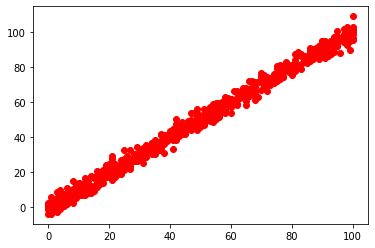

In [9]:
plt.scatter(x,y,color='red')
plt.show()

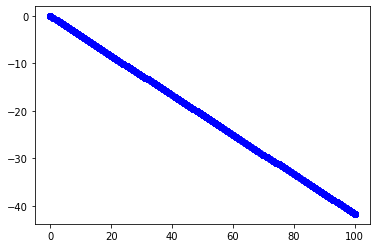

In [10]:
plt.scatter(x,pred,color='blue')
plt.show()

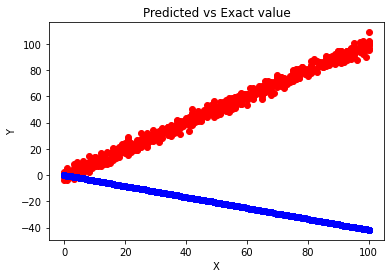

In [11]:
plt.scatter(x,y,color='red')
plt.scatter(x,pred,color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Predicted vs Exact value")
plt.show()

### Residuals

Residuals can be understood as the leftovers from the model fit. It is defined as the difference between observed and predicted value. So the formula for residuals is: -

<center><font size=5>$e_i = y_i - \hat{y}_i$</font></center>
<font size =3>$e_i$</font>: Error or residual
<font size =3>$y_i$</font>: Exact value
<font size =3>$\hat{y}_i$</font>: Predicted value

<img src = "pics/residuals.JPG">

In [12]:
#Calculating error
error = y-pred
print(error)

[[ 31.60790712]
 [ 68.35862225]
 [ 23.52629088]
 [ 52.47946306]
 [123.60318344]
 [ 47.52342426]
 [ 15.83825783]
 [114.57705107]
 [ 35.08736448]
 [  9.10337514]
 [ 17.96196577]
 [ 20.25729445]
 [ 34.66169415]
 [ 55.71032264]
 [ 70.99872897]
 [ 86.76074086]
 [ 37.82029504]
 [100.88479519]
 [ 41.48316848]
 [ 38.28471202]
 [ 97.42514384]
 [121.30904658]
 [ 81.27132503]
 [ 73.15338969]
 [118.09164803]
 [ 81.28574904]
 [ 68.43623476]
 [ 32.7336881 ]
 [132.2493559 ]
 [ 68.10035046]
 [  8.8046216 ]
 [ 32.46761208]
 [ 59.89161306]
 [  0.38535627]
 [ 86.98477465]
 [129.99191087]
 [ 55.76340302]
 [  8.96964137]
 [ 31.39834104]
 [ 89.57624459]
 [120.09171558]
 [ -1.23004406]
 [ 86.1709616 ]
 [ 29.9349994 ]
 [ 48.72149126]
 [ 25.58412835]
 [ 83.20803622]
 [ 74.13482466]
 [ 30.11101403]
 [ 48.88394932]
 [121.66890697]
 [ 61.02588908]
 [  6.2382335 ]
 [ 85.86796622]
 [ 23.59765245]
 [ 15.66021319]
 [111.54362233]
 [ 91.46187571]
 [ 13.84070511]
 [ 27.16912722]
 [ 85.97929628]
 [102.50645057]
 [ 32.57

### Cost Function

The main purpose of training a machine learning algorithm is to mimize the error and find out the best fit. We use cost function which is an everage of residuals or loss function to optimize our parameters.

***Mean Square Error*** :-

<center><font size=5>$J(w,b) = \frac{1}{N}\sum_{i=1}^n(y_i-(wx+b))^2$</font></center>

In [13]:
def cost_func(y,x):
    """This function will calculate the cost function or Mean Square Error function
    parameters
    y: Exact value
    x: Feature
    
    output
    J: cost function value for linear regression
    """    
    y_hat = linear_regression(x)
    loss = (y - y_hat)**2 #calculating squared error
    cost = np.mean(loss)
    return cost

In [14]:
cost_func(y,x)

6708.093698750811

### Gradient Descent

Gradient descent is an optimisation algorithm, which is used to minimize the cost function by iteratively moving in the direction toward its lowest point or global minima. Since, we already have the value of *x* so we have to optimise our parameters *w* and *b*.
<center><font size=5>$w: = w - \alpha\frac{d}{dw}J(w,b)$</font></center>
<center><font size=5>$b: = b - \alpha\frac{d}{db}J(w,b)$</font></center>

<font size = 3>$w, b$</font> - parameters, which will be updated on every iteration<br>
<font size = 3>$\alpha$</font> - learning rate, the step size which we take on every iteration<br>
<font size = 3>$\frac{d}{dw}J(w,b), \frac{d}{db}J(w,b)$</font> - derivative of cost function with respect to weight and bias parameter<br>
<font size = 3>$\frac{d}{dw}J(w,b) = \frac{2}{N}\sum_{i=1}^n(y_i - (wx + b)(-x))$ </font><br>
<font size = 3>$\frac{d}{db}J(w,b) = \frac{2}{N}\sum_{i=1}^n(y_i - (wx + b)(-1))$ </font><br>

<img src="pics\gradientdescent.JPG">
<caption><center>**Gradient Descent**</center></caption>


In [15]:
def cost_J(y,x,w,b):
    """This function will calculate the cost function with the given parameters
    parameters
    y: labels
    x: Feature
    w: weight
    b: bias
    
    output
    J: cost function
    """
    J = np.mean((y-(np.dot(w,x.T)+b))**2)
    return J
def derivative_cost(y,x,w,b):
    """This function is used to calculate derivative of cost function with respect to weight and bias
    parameters
    y: labels
    x: Feature
    w: weight
    b: bias
    
    output
    dw: derivate of cost function with respect to weight
    db: derivative of cost function with respect to bias
    """
    dw = np.mean(-2*x*(y-(np.dot(w,x.T)+b)))
    db = np.mean(-2*(y-(np.dot(w,x.T)+b)))
    return dw,db

In [16]:
derivative_cost(y,x,np.random.randn(1,1), np.random.randn(1,1))

(-17193.868658084015, -310.2799277815281)

In [17]:
np.random.seed(5)
w = np.random.randn(1,1)
b = np.random.randn(1,1)
learning_rate = 0.001
weight = []
bias = []
cost = []
iteration = []
for i in range(10000):
    dw, db = derivative_cost(y,x,w,b)
    cost_i = cost_J(y,x,w,b)
    w_new = w - learning_rate*(dw)
    b_new = b - learning_rate*(db)
    w = w_new
    b = b_new
    weight.append(w), bias.append(b), cost.append(cost_i), iteration.append(i)
    cache = {"weight": weight, "bias": bias, "cost": cost, "iteration": iteration}

c:\users\gselvara\miniconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
c:\users\gselvara\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
c:\users\gselvara\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


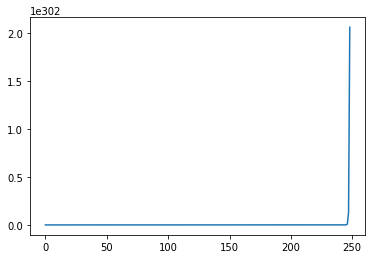

In [18]:
plt.plot(cache['iteration'],cache['cost'])
plt.show()

In [19]:
cost[-1]

nan

In [20]:
y_hat = (np.dot(w,x.T) +  b).T

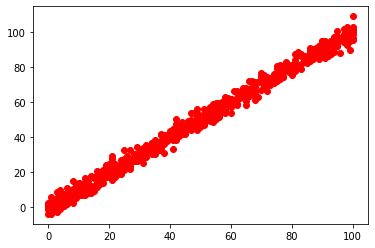

In [21]:
plt.scatter(x,y,color = 'red')
plt.scatter(x,y_hat, color= 'blue')
plt.show()

### R Sqared

We have seen the model optimize, now let us check the fit of the model. In order to do that we use $R^2$. So $R^2$ is defined as the method to evaluate the strength of a linear model. $R^2$ is going to be a number which is between 0 to 1.<br>
<br>
<center><font size = 5>$R^2 = 1 - \frac{Sum Squared Regression(SSR)}{Total Sum of Squares(SST)}$</font></center>
<br>
<br>
<center><font size = 5>$R^2(y,\hat{y}) = 1 - \frac{\sum_{i=1}^n(y_i -\hat{y_i})^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$</font></center>

Here $\bar{y}$ is the mean of the dependent variable y

<font size = 5>$\bar{y} = \frac{1}{N}\sum_{i=1}^ny_i$</font>

In [22]:
def rSquared(y,y_hat):
    """This function will help calculate the value of R Square
    parameters
    y: dependent variable or label
    y_hat: predict value
    
    outpur
    r_2: Value of R square
    """
    SSR = np.sum((y-y_hat)**2)
    y_bar = np.mean(y)
    SST = np.sum((y-y_bar)**2)
    r_2 = 1-(SSR/SST)
    return r_2

In [23]:
rSquared(y,y_hat)

nan

### Multivaraiate Linear Regression
<br>
When we have more than one independent variable, then it is called multivariate linear regression.
<br>
<br>
<font size = 3><center>$\hat{y} = w_0x_0 + w_1x_1 + w_2x_2 + b$</center></font>
<br>

### Polynomial Regression

In case when the data is not linear, we use polynomial regression to fit a curve to reduce the error. 
<br>
<img src = "pics/polynomial.jpg">
<caption><center>**Polynomial Regression**</center></caption>
<br>
The equation for the polynomial regression is defined as:-
<br>
<br>
<center><font size=5>$\hat{y} = w_0 + w_1x + w_2x^2$</font></center>

